In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gl(l, lambdaa, gamma):
    phi = np.linspace(0.00001, 2*np.pi, 1000)
    f1 = np.cos(phi) - lambdaa - complex(0,1)*gamma*np.sin(phi)
    f2 = (1.0/(2.0*np.pi))*np.exp(-complex(0,1)*l*phi)*np.sign(f1)#(f1/np.abs(f1))
    return np.trapz(f2, x=phi)

def PImatrix(l, lambdaa, gamma):
    return np.array([[0,gl(l, lambdaa, gamma)],[-gl(-l, lambdaa, gamma),0]])

def GAMMA(lambdaa, gamma, N):
    matrix = []
    for i in range(N):
        row = []
        for j in range(N):
            row.append(PImatrix(j-i, lambdaa, gamma))
        matrix.append(row)

    return np.block(matrix)

In [10]:
lambdaa, gamma, N = 1, 0.5, 15
GAMMA_matrix = GAMMA(lambdaa, gamma, N)
L = 2
nu_matrix = complex(0,1)*GAMMA_matrix[:2*L, :2*L]
nu_matrix_abs = np.abs(nu_matrix) # np.imag
eigenvalues, eigenvectors = np.linalg.eig(nu_matrix_abs)

print(eigenvalues)

[-1.         -0.99799482  1.          0.99799482]


In [11]:
def positive_eigenvalues(eigenvalues):
    positive = []
    for eigen in eigenvalues:
        if eigen >=0:
            positive.append(eigen)
    return np.array(positive)

pos_eigen = positive_eigenvalues(eigenvalues)

In [12]:
def shannon(posit):
    fact = (1.0 + posit)/2.0
    s_i = -fact*np.log(fact)
    return np.sum(s_i)

print(shannon(pos_eigen))

0.001002088194928219


In [13]:
def S_L(L, lambdaa, gamma, N):
    GAMMA_matrix = GAMMA(lambdaa, gamma, N)
    nu_matrix = complex(0,1)*GAMMA_matrix[:2*L, :2*L]
    nu_matrix_abs = np.abs(nu_matrix) # np.imag
    eigenvalues, eigenvectors = np.linalg.eig(nu_matrix_abs)
    pos_eigen = positive_eigenvalues(eigenvalues)
    return np.abs(shannon(pos_eigen))

In [16]:
Ls = np.arange(1,0)

lambdaa, gamma, N = 1.0, 0.5, 100

S_Ls = []

for L in Ls:
    S_Ls.append(S_L(L, lambdaa, gamma, N))

print(S_Ls)

[0.0005011698090653406, 0.001002088194928219, 0.0015027552836342942, 0.002003171201107959, 0.0025033360731527357, 0.003003250025448804, 0.0035029131835623943, 0.004002325672931202, 0.0045014876188804506, 0.005000399146609635, 0.0054990603811978095, 0.005997471447616764, 0.006495632470700563, 0.006993543575176579, 0.007491204885647255, 0.007988616526602599, 0.008485778622402716, 0.008982691297302534, 0.009479354675429746]


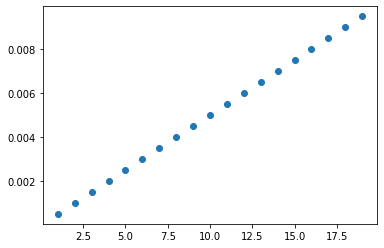

In [18]:
plt.plot(Ls, S_Ls, "o")
